# Using lemonade.csv dataset and focusing on continuous variables:

* Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
* Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
* Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
* Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?
* Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

2. Use a 2 sigma decision rule to isolate the outliers.

* Do these make sense?
* Should certain outliers be kept or removed?

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
import sklearn.cluster

In [62]:
df=pd.read_csv('lemonade.csv')

In [63]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
df.shape

(365, 7)

In [6]:
df.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [7]:
df.Date

0        1/1/17
1        1/2/17
2        1/3/17
3        1/4/17
4        1/5/17
         ...   
360    12/27/17
361    12/28/17
362    12/29/17
363    12/30/17
364    12/31/17
Name: Date, Length: 365, dtype: object

### Visualization of the data

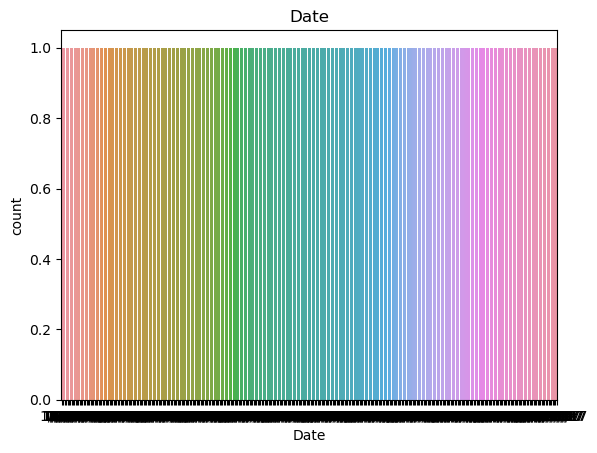

------------


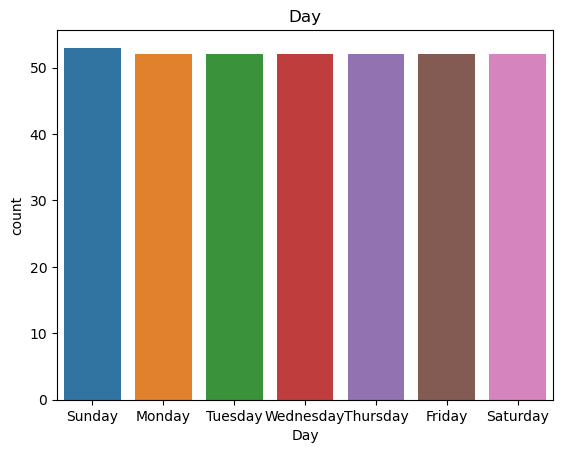

------------


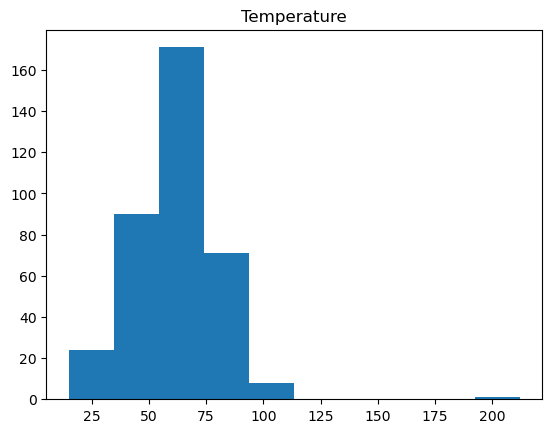

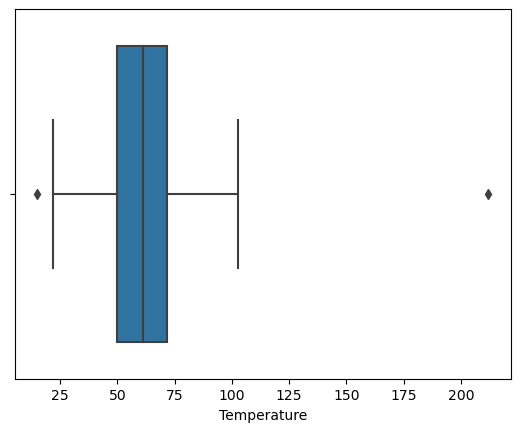

------------


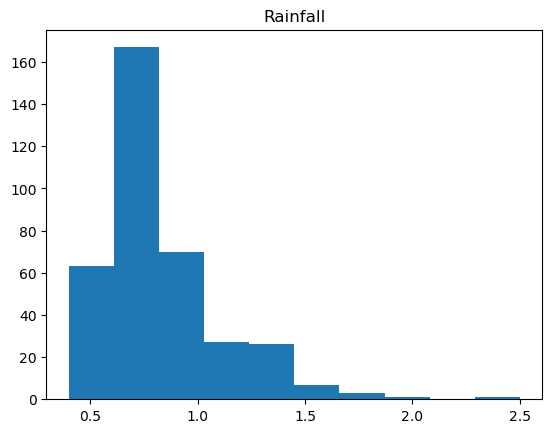

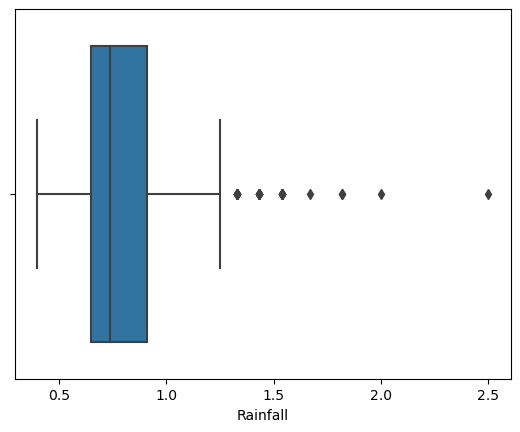

------------


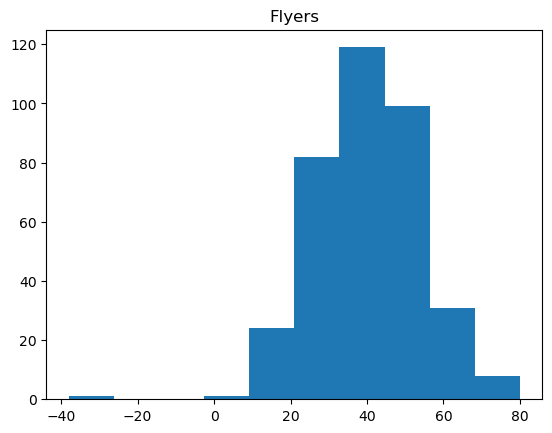

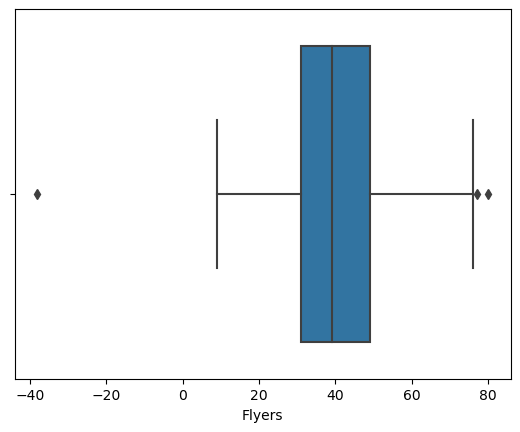

------------


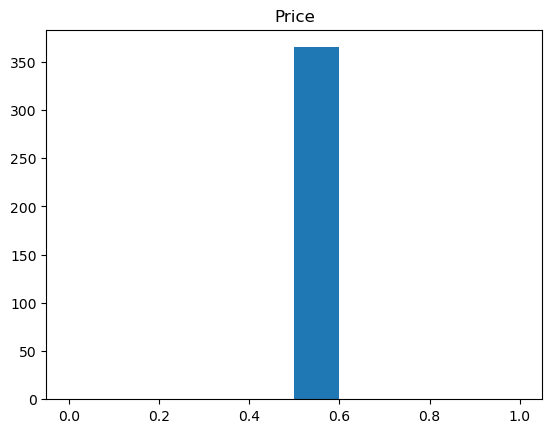

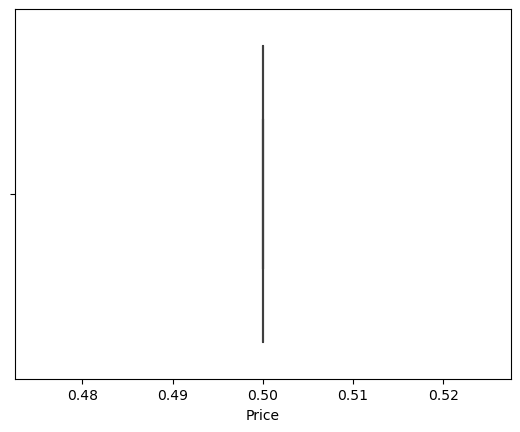

------------


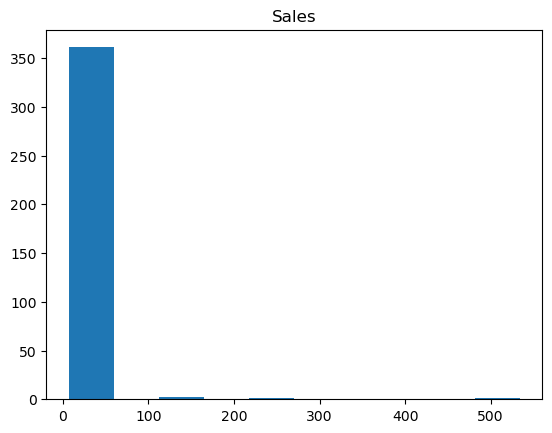

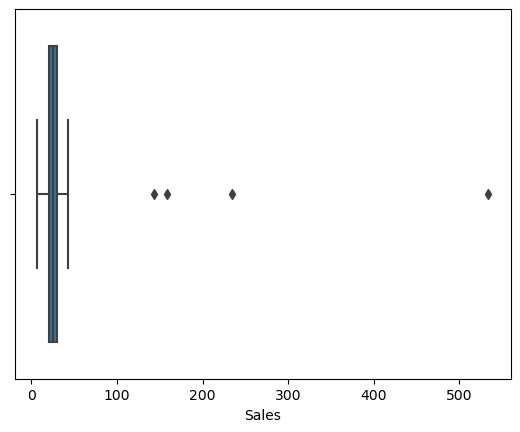

------------


In [8]:
cols = ['Date','Day','Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

for col in cols:
    if df[col].dtype == 'object':  # Check if column data type is 'object' (string)
        sns.countplot(data=df, x=col)
        plt.title(col.replace('_', ' ').capitalize())
        plt.show()
    else:
        plt.hist(df[col])
        plt.title(col.replace('_', ' ').capitalize())
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()
    print('------------')

# IQR,Calculating Fences:

lower fence: Q1 - multiplier * IQR
upper fence: Q3 + multiplier * IQR

In [27]:
df.head(3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
1,2017-01-02,Monday,28.9,1.33,15,0.5,13
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15


In [64]:
df.Temperature=df.Temperature.astype(float)

In [68]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

In [69]:
df.Sales.quantile(0.25)

20.0

In [70]:
multiplier =1.5

#calculate our q1 and q3
q1 = df.Sales.quantile(0.25)
q3 = df.Sales.quantile(0.75)
iqr = q3-q1

In [71]:
q1 - (multiplier * iqr), q3 + (multiplier * iqr)

(5.0, 45.0)

In [72]:
inner_lower_fence = q1 - (multiplier * iqr) 
inner_upper_fence = q3 + (multiplier * iqr) 

In [73]:

def get_lower_and_upper_bounds(zscore_series, multiplier=1.5):
    if isinstance(zscore_series, pd.Series):
        # If zscore_series is already a Series, proceed as usual
        lower_bound = zscore_series.mean() - multiplier * zscore_series.std()
        upper_bound = zscore_series.mean() + multiplier * zscore_series.std()
    elif isinstance(zscore_series, pd.DataFrame):
        # If zscore_series is a DataFrame, select a valid column before calculations
        column = zscore_series.select_dtypes(include='number').columns[0]
        lower_bound = zscore_series[column].mean() - multiplier * zscore_series[column].std()
        upper_bound = zscore_series[column].mean() + multiplier * zscore_series[column].std()
    else:
        raise ValueError("Invalid input type. Expected pandas Series or DataFrame.")

    return lower_bound, upper_bound

In [74]:
get_lower_and_upper_bounds(df)

(34.0958190867927, 88.35349598170053)

In [75]:
get_lower_and_upper_bounds(df,multiplier=3)

(6.966980639338786, 115.48233442915445)

2. Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?

Should certain outliers be kept or removed?

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [99]:
def apply_two_sigma_decision_rule(array):
    mean = np.mean(array)
    std_dev = np.std(array)
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev
    outliers = [x for x in array if x < lower_bound or x > upper_bound]
    return outliers

In [100]:
apply_two_sigma_decision_rule(df.Sales)

[143, 158, 235, 534]

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

In [91]:
def calculate_z_scores(array):
    z_scores = (array - np.mean(array)) / np.std(array)
    return z_scores

In [95]:
zscores=calculate_z_scores(df.Sales)

In [96]:
df.Sales[zscores.abs() >= 2]

181    143
182    158
183    235
184    534
Name: Sales, dtype: int64

In [97]:
len(x[zscores.abs() >= 2])

4

In [98]:
x[zscores.abs() >= 3]

181     3.725339
182     4.210686
183     6.702136
184    16.376724
Name: Sales, dtype: float64

In [101]:
def plot_two_sigma_decision_rule(array):
    mean = np.mean(array)
    std_dev = np.std(array)
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev

    plt.scatter(range(len(array)), array, label='Data')
    plt.axhline(lower_bound, color='r', linestyle='--', label='Lower Bound')
    plt.axhline(upper_bound, color='r', linestyle='--', label='Upper Bound')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Two Sigma Decision Rule')
    plt.legend()
    plt.show()

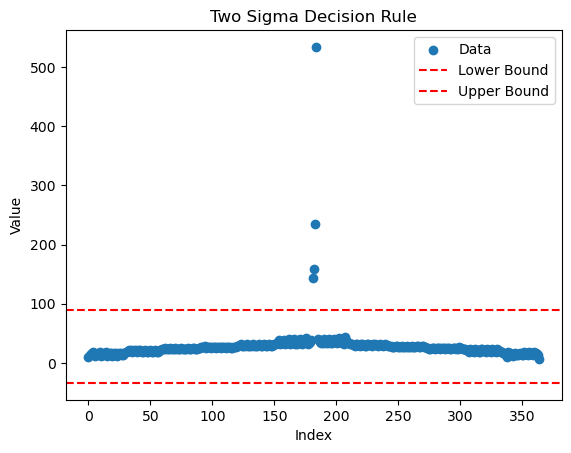

In [102]:
plot_two_sigma_decision_rule(df.Sales)

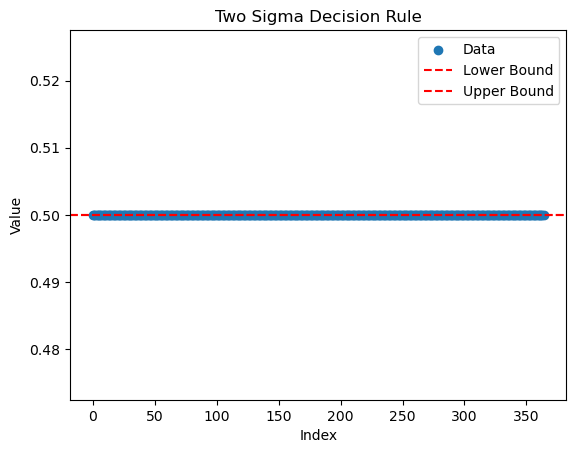

In [105]:
plot_two_sigma_decision_rule(df.Price)

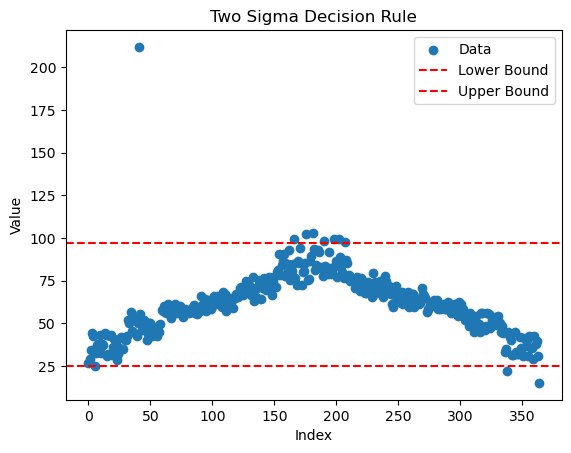

In [106]:
plot_two_sigma_decision_rule(df.Temperature)

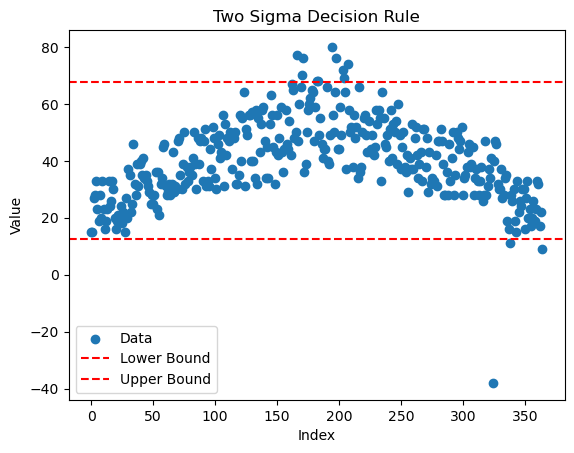

In [109]:
plot_two_sigma_decision_rule(df.Flyers)

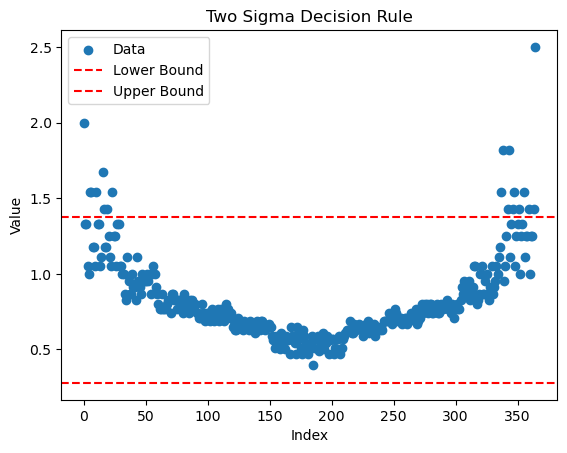

In [110]:
plot_two_sigma_decision_rule(df.Rainfall)

In [111]:
def apply_three_sigma_rule(array):
    mean = np.mean(array)
    std_dev = np.std(array)
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    outliers = [x for x in array if x < lower_bound or x > upper_bound]
    return outliers

def apply_68_95_997_rule(array):
    mean = np.mean(array)
    std_dev = np.std(array)
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    inliers = [x for x in array if lower_bound <= x <= upper_bound]
    return inliers

def plot_rules(array):
    fig, ax = plt.subplots()
    ax.hist(array, bins='auto', alpha=0.7, color='blue', label='Data')
    ax.axvline(np.mean(array), color='red', linestyle='--', label='Mean')
    ax.axvline(np.mean(array) - np.std(array), color='orange', linestyle='--', label='1 Standard Deviation')
    ax.axvline(np.mean(array) + np.std(array), color='orange', linestyle='--')
    ax.axvline(np.mean(array) - 2 * np.std(array), color='green', linestyle='--', label='2 Standard Deviations')
    ax.axvline(np.mean(array) + 2 * np.std(array), color='green', linestyle='--')
    ax.axvline(np.mean(array) - 3 * np.std(array), color='purple', linestyle='--', label='3 Standard Deviations')
    ax.axvline(np.mean(array) + 3 * np.std(array), color='purple', linestyle='--')
    ax.legend()
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Data Distribution and Rules')
    plt.show()

In [112]:
apply_three_sigma_rule(df.Sales)

[143, 158, 235, 534]

In [113]:
apply_68_95_997_rule(df.Sales)

[10,
 13,
 15,
 17,
 18,
 11,
 13,
 15,
 17,
 18,
 12,
 14,
 15,
 17,
 18,
 12,
 14,
 16,
 17,
 12,
 14,
 16,
 17,
 12,
 14,
 16,
 17,
 13,
 14,
 17,
 18,
 18,
 20,
 21,
 22,
 18,
 20,
 21,
 22,
 19,
 20,
 21,
 22,
 18,
 19,
 20,
 21,
 18,
 19,
 20,
 21,
 18,
 19,
 20,
 21,
 18,
 19,
 20,
 22,
 23,
 24,
 24,
 25,
 23,
 24,
 24,
 25,
 23,
 24,
 24,
 25,
 23,
 23,
 24,
 24,
 25,
 23,
 23,
 24,
 24,
 25,
 23,
 23,
 24,
 25,
 25,
 23,
 24,
 24,
 25,
 25,
 26,
 26,
 27,
 28,
 25,
 26,
 26,
 27,
 25,
 26,
 27,
 27,
 25,
 26,
 27,
 27,
 25,
 26,
 27,
 27,
 25,
 26,
 27,
 27,
 25,
 25,
 26,
 27,
 27,
 29,
 29,
 30,
 31,
 28,
 29,
 29,
 30,
 31,
 28,
 29,
 29,
 30,
 31,
 28,
 29,
 29,
 30,
 31,
 28,
 29,
 30,
 31,
 28,
 29,
 30,
 31,
 29,
 29,
 30,
 31,
 31,
 33,
 35,
 38,
 32,
 34,
 36,
 39,
 32,
 35,
 36,
 40,
 32,
 35,
 36,
 41,
 31,
 32,
 35,
 37,
 41,
 31,
 33,
 35,
 37,
 42,
 31,
 33,
 35,
 38,
 40,
 39,
 35,
 34,
 33,
 40,
 35,
 34,
 33,
 40,
 35,
 34,
 33,
 41,
 36,
 35,
 33,
 42,
 37,


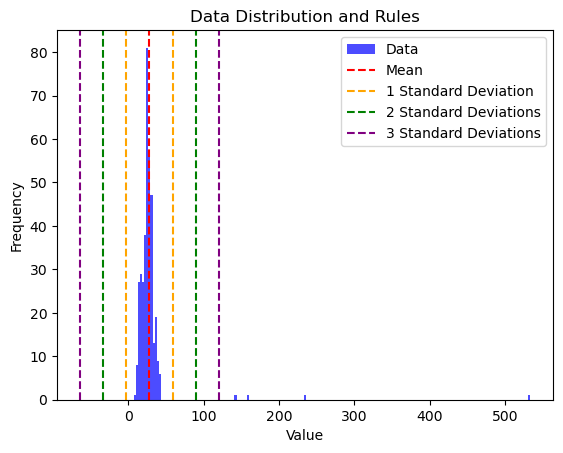

In [114]:
plot_rules(df.Sales)

Outliers (Three Sigma Rule): [143, 158, 235, 534]
Inliers (68-95-99.7 Rule): [10, 13, 15, 17, 18, 11, 13, 15, 17, 18, 12, 14, 15, 17, 18, 12, 14, 16, 17, 12, 14, 16, 17, 12, 14, 16, 17, 13, 14, 17, 18, 18, 20, 21, 22, 18, 20, 21, 22, 19, 20, 21, 22, 18, 19, 20, 21, 18, 19, 20, 21, 18, 19, 20, 21, 18, 19, 20, 22, 23, 24, 24, 25, 23, 24, 24, 25, 23, 24, 24, 25, 23, 23, 24, 24, 25, 23, 23, 24, 24, 25, 23, 23, 24, 25, 25, 23, 24, 24, 25, 25, 26, 26, 27, 28, 25, 26, 26, 27, 25, 26, 27, 27, 25, 26, 27, 27, 25, 26, 27, 27, 25, 26, 27, 27, 25, 25, 26, 27, 27, 29, 29, 30, 31, 28, 29, 29, 30, 31, 28, 29, 29, 30, 31, 28, 29, 29, 30, 31, 28, 29, 30, 31, 28, 29, 30, 31, 29, 29, 30, 31, 31, 33, 35, 38, 32, 34, 36, 39, 32, 35, 36, 40, 32, 35, 36, 41, 31, 32, 35, 37, 41, 31, 33, 35, 37, 42, 31, 33, 35, 38, 40, 39, 35, 34, 33, 40, 35, 34, 33, 40, 35, 34, 33, 41, 36, 35, 33, 42, 37, 35, 33, 32, 43, 38, 35, 34, 32, 32, 31, 30, 29, 32, 31, 30, 29, 32, 31, 30, 29, 29, 32, 31, 30, 30, 29, 32, 31, 30, 30, 29

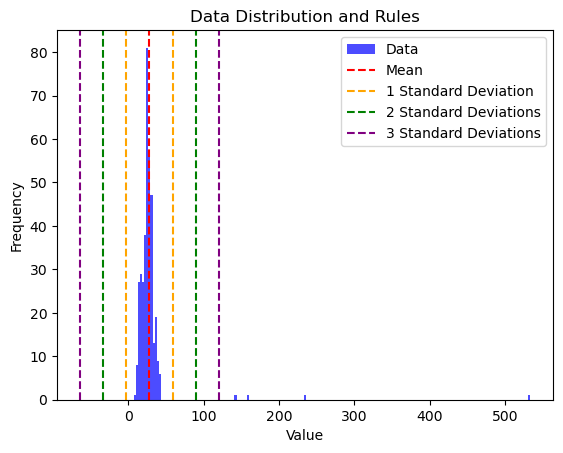

In [115]:
my_array=df.Sales
outliers_three_sigma = apply_three_sigma_rule(my_array)
inliers_68_95_997 = apply_68_95_997_rule(my_array)

print("Outliers (Three Sigma Rule):", outliers_three_sigma)
print("Inliers (68-95-99.7 Rule):", inliers_68_95_997)

plot_rules(my_array)

Outliers (Three Sigma Rule): [212.0]
Inliers (68-95-99.7 Rule): [27.0, 28.9, 34.5, 44.1, 42.4, 25.3, 32.9, 37.5, 38.1, 43.4, 32.6, 38.2, 37.5, 44.1, 43.4, 30.6, 32.2, 42.8, 43.1, 31.6, 36.2, 40.8, 38.1, 28.6, 32.2, 35.8, 42.1, 34.9, 35.2, 41.1, 40.4, 42.4, 52.0, 50.3, 56.6, 45.4, 45.0, 52.3, 52.6, 42.7, 50.0, 55.6, 46.4, 47.7, 52.0, 47.3, 40.4, 43.7, 50.0, 50.3, 42.4, 47.7, 45.0, 47.3, 42.4, 48.7, 45.0, 49.6, 57.9, 57.2, 60.2, 59.5, 55.9, 61.2, 60.2, 58.5, 52.9, 59.2, 58.2, 61.5, 55.9, 58.9, 56.2, 60.2, 56.5, 53.9, 56.9, 58.2, 57.2, 56.5, 55.9, 56.9, 58.2, 59.5, 60.5, 55.9, 57.2, 55.2, 58.5, 57.5, 65.8, 60.8, 62.1, 64.4, 57.5, 59.8, 63.8, 63.1, 58.5, 60.8, 66.1, 61.1, 61.5, 65.8, 65.1, 64.1, 62.5, 59.8, 68.1, 67.1, 57.5, 60.8, 65.1, 65.1, 62.5, 63.5, 58.8, 65.1, 67.1, 66.7, 65.7, 71.0, 71.3, 69.4, 66.7, 69.7, 75.0, 71.3, 69.4, 72.7, 66.7, 70.0, 77.3, 63.4, 65.7, 70.7, 72.0, 75.3, 64.4, 71.7, 71.0, 76.3, 69.4, 71.7, 72.0, 77.3, 71.7, 66.7, 75.0, 77.3, 71.3, 79.9, 81.5, 90.4, 78.6, 84.2,

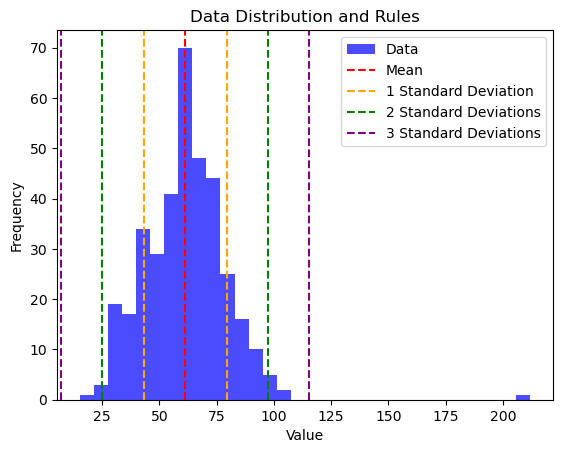

In [116]:
my_array=df.Temperature
outliers_three_sigma = apply_three_sigma_rule(my_array)
inliers_68_95_997 = apply_68_95_997_rule(my_array)

print("Outliers (Three Sigma Rule):", outliers_three_sigma)
print("Inliers (68-95-99.7 Rule):", inliers_68_95_997)

plot_rules(my_array)